In [1]:
import sqlite3
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
import matplotlib.pyplot as plt 

sns.set(style="white") #white background style for seaborn plots
sns.set(style="whitegrid", color_codes=True)

# Reading Data

In [2]:
#Connecting to Soccer database (https://www.kaggle.com/hugomathien/soccer)
conn = sqlite3.connect('./database.sqlite') 
c=conn.cursor()                                                  #creating cursor

#displaying all available tables in database
c.execute("SELECT name FROM sqlite_master WHERE type='table';")
print(c.fetchall())

[('sqlite_sequence',), ('Player_Attributes',), ('Player',), ('Match',), ('League',), ('Country',), ('Team',), ('Team_Attributes',)]


In [3]:
c.execute("SELECT * FROM Player_Attributes;")
print(c.fetchall())    # directly will not show as data beyond set limits

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



# 1. Loading Player_Attributes Table to Pandas Frame

In [4]:
df = pd.read_sql_query("SELECT * FROM Player_Attributes", conn)     #passing query and connection
df.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [144]:
#printing all features
df.keys()
df.head().transpose()

,0,1,2,3,4
id,1,2,3,4,5
player_fifa_api_id,218353,218353,218353,218353,218353
player_api_id,505942,505942,505942,505942,505942
date,2016-02-18 00:00:00,2015-11-19 00:00:00,2015-09-21 00:00:00,2015-03-20 00:00:00,2007-02-22 00:00:00
overall_rating,67,67,62,61,61
potential,71,71,66,65,65
preferred_foot,right,right,right,right,right
attacking_work_rate,medium,medium,medium,medium,medium
defensive_work_rate,medium,medium,medium,medium,medium
crossing,49,49,49,48,48


In [145]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,183978.0,91989.500000,53110.018250,1.0,45995.25,91989.5,137983.75,183978.0
player_fifa_api_id,183978.0,165671.524291,53851.094769,2.0,155798.00,183488.0,199848.00,234141.0
player_api_id,183978.0,135900.617324,136927.840510,2625.0,34763.00,77741.0,191080.00,750584.0
overall_rating,183142.0,68.600015,7.041139,33.0,64.00,69.0,73.00,94.0
potential,183142.0,73.460353,6.592271,39.0,69.00,74.0,78.00,97.0
crossing,183142.0,55.086883,17.242135,1.0,45.00,59.0,68.00,95.0
finishing,183142.0,49.921078,19.038705,1.0,34.00,53.0,65.00,97.0
heading_accuracy,183142.0,57.266023,16.488905,1.0,49.00,60.0,68.00,98.0
short_passing,183142.0,62.429672,14.194068,3.0,57.00,65.0,72.00,97.0
volleys,181265.0,49.468436,18.256618,1.0,35.00,52.0,64.00,93.0


In [7]:
df.shape[0]

183978

# 2. Pre-processing, Data Quality and Missing value Assessment

In [8]:
#checking for null
df.isnull().sum()

id                        0
player_fifa_api_id        0
player_api_id             0
date                      0
overall_rating          836
potential               836
preferred_foot          836
attacking_work_rate    3230
defensive_work_rate     836
crossing                836
finishing               836
heading_accuracy        836
short_passing           836
volleys                2713
dribbling               836
curve                  2713
free_kick_accuracy      836
long_passing            836
ball_control            836
acceleration            836
sprint_speed            836
agility                2713
reactions               836
balance                2713
shot_power              836
jumping                2713
stamina                 836
strength                836
long_shots              836
aggression              836
interceptions           836
positioning             836
vision                 2713
penalties               836
marking                 836
standing_tackle     

#### 2.1 overall_rating Missiing values Analysis

In [9]:
# percent of missing "overall_rating" 
print('Percent of missing "overall_rating" records is %.2f%%' %((df['overall_rating'].isnull().sum()/df.shape[0])*100))
print("small amount is missing we can fill this by observing mean and median of the same")

Percent of missing "overall_rating" records is 0.45%
small amount is missing we can fill this by observing mean and median of the same


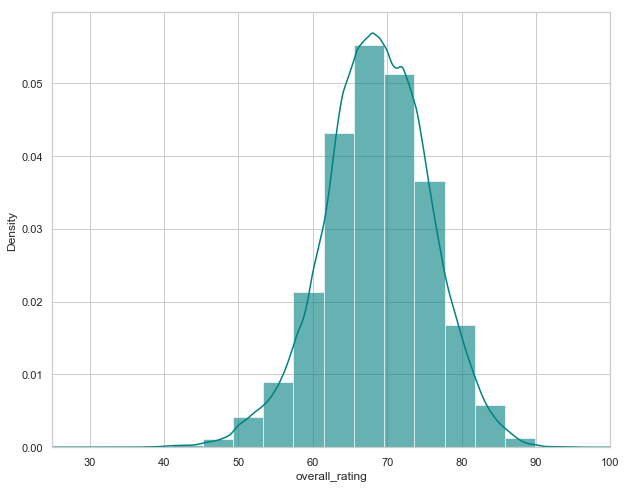

In [10]:
plt.figure(figsize=(10,8))
ax = df["overall_rating"].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
df["overall_rating"].plot(kind='density', color='teal')
ax.set(xlabel='overall_rating')
plt.xlim(25,100)    # as in describe minimum is 33 and maximum is 94
plt.show()

it looks like almost uniform hence we can replace blank values by mean

In [11]:
# mean overall_rating
print('The mean of "Age" is %.2f' %(df["overall_rating"].mean(skipna=True)))
# median overall_rating
print('The median of "Age" is %.2f' %(df["overall_rating"].median(skipna=True)))

The mean of "Age" is 68.60
The median of "Age" is 69.00


#### 2.2 potential Missing value analysis

In [12]:
# percent of missing "overall_rating" 
print('Percent of missing "overall_rating" records is %.2f%%' %((df['potential'].isnull().sum()/df.shape[0])*100))
print("small amount is missing we can fill this by observing mean and median of the same, \
      and having same count of missiing values would fall in this percent of misiion values")

Percent of missing "overall_rating" records is 0.45%
small amount is missing we can fill this by observing mean and median of the same,       and having same count of missiing values would fall in this percent of misiion values


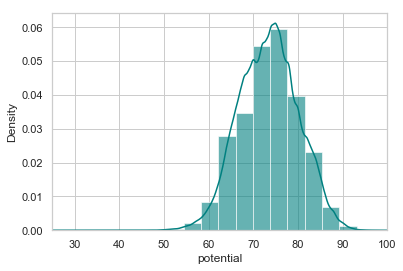

In [13]:
#ploting potential
#plt.figure(figsize=(10,8))
ax = df["potential"].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
df["potential"].plot(kind='density', color='teal')
ax.set(xlabel='potential')
plt.xlim(25,100)        #min 39 max 97
plt.show()

looking much closer to uniform so we can replace nan with mean or median after observing

In [14]:
# mean potential
print('The mean of "Age" is %.2f' %(df["potential"].mean(skipna=True)))
# median potential
print('The median of "Age" is %.2f' %(df["potential"].median(skipna=True)))

The mean of "Age" is 73.46
The median of "Age" is 74.00


##### Observation on Missing values

    * like this we can analyse all features having null values and can fill them with mean / median / or some other suitable value, after exploring/ analysing  the distribution of the data
    #with below given method
   **df["potential"].fillna(df["potential"].mean(skipna=True), inplace=True)**

    * in our case maximum missing (in a column is 3230) values which is 1.7% and, maximum columns have missing values less than 1% so we can drop and can test how much we loosing data

In [15]:
df_new = df.dropna()
print(df_new.shape, df.shape)
print("Loss of data after dropna:{:.2f}%".format(((df.shape[0]-df_new.shape[0])/df.shape[0])*100)  )
# approx 2% (1.97%) data we lost which not big enough to effect our model so we can drop

(180354, 42) (183978, 42)
Loss of data after dropna:1.97%


In [16]:
#Nan explicitly
df_new.isnull().sum()

id                     0
player_fifa_api_id     0
player_api_id          0
date                   0
overall_rating         0
potential              0
preferred_foot         0
attacking_work_rate    0
defensive_work_rate    0
crossing               0
finishing              0
heading_accuracy       0
short_passing          0
volleys                0
dribbling              0
curve                  0
free_kick_accuracy     0
long_passing           0
ball_control           0
acceleration           0
sprint_speed           0
agility                0
reactions              0
balance                0
shot_power             0
jumping                0
stamina                0
strength               0
long_shots             0
aggression             0
interceptions          0
positioning            0
vision                 0
penalties              0
marking                0
standing_tackle        0
sliding_tackle         0
gk_diving              0
gk_handling            0
gk_kicking             0


In [17]:
#id/player_fifa_api_id/player_api_id/date   columns have no impact on the prespective model so we can drop them
#and can extract our target variable 'overall_rating' in seperate frame 

df_new.drop('id', axis=1, inplace=True)
df_new.drop('player_fifa_api_id', axis=1, inplace=True)
df_new.drop('player_api_id', axis=1, inplace=True)
df_new.drop('date', axis=1, inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [18]:
df_new.head()


,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,volleys,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,62.0,66.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


### Cleaning of Categorical Features

In [19]:
df_copy=df_new.copy()  #making copy
df_copy.info()    #as per the info we have only 3 object (string) fields

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180354 entries, 0 to 183977
Data columns (total 38 columns):
overall_rating         180354 non-null float64
potential              180354 non-null float64
preferred_foot         180354 non-null object
attacking_work_rate    180354 non-null object
defensive_work_rate    180354 non-null object
crossing               180354 non-null float64
finishing              180354 non-null float64
heading_accuracy       180354 non-null float64
short_passing          180354 non-null float64
volleys                180354 non-null float64
dribbling              180354 non-null float64
curve                  180354 non-null float64
free_kick_accuracy     180354 non-null float64
long_passing           180354 non-null float64
ball_control           180354 non-null float64
acceleration           180354 non-null float64
sprint_speed           180354 non-null float64
agility                180354 non-null float64
reactions              180354 non-null float64

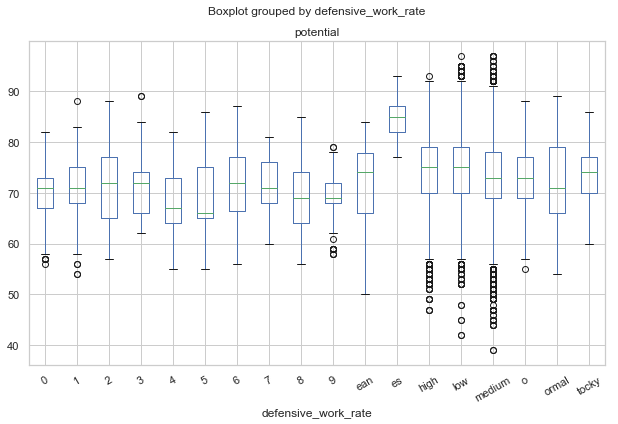

In [20]:
df_copy.boxplot('potential','defensive_work_rate',rot = 30,figsize=(10,6))

we can plot boxplot of any categorical varival with any continueous feature to demonstarate categories

#### Extraction of all categorical (object type) columns into seperate data frame

In [21]:
#Analysing ---->preferred_foot/attacking_work_rate/defensive_work_rate
#extracting the categorical data into seperate frame
cat_df = df_copy.select_dtypes(include=['object']).copy()

In [22]:
cat_df.head()


,preferred_foot,attacking_work_rate,defensive_work_rate
0,right,medium,medium
1,right,medium,medium
2,right,medium,medium
3,right,medium,medium
4,right,medium,medium


##### Ploting Frequency distribution of all Categorical Features 

In [23]:
print("Total Category:",cat_df['preferred_foot'].value_counts()) 

Total Category: right    136247
left      44107
Name: preferred_foot, dtype: int64


Total Category: 2


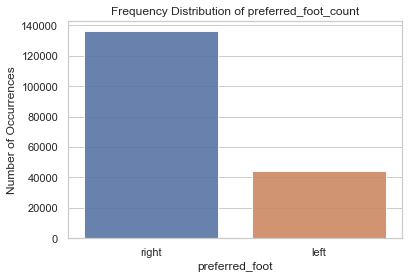

In [24]:
%matplotlib inline
print("Total Category:",cat_df['preferred_foot'].value_counts().count())   # this way we can check total no. of categories
preferred_foot_count = cat_df['preferred_foot'].value_counts()

sns.barplot(preferred_foot_count.index, preferred_foot_count.values, alpha=0.9)
plt.title('Frequency Distribution of preferred_foot_count')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('preferred_foot', fontsize=12)
plt.show()

Similarly, you could plot a pie chart with the matplotlib library to get the same information. The labels list below holds the category names from the preferred_foot column:

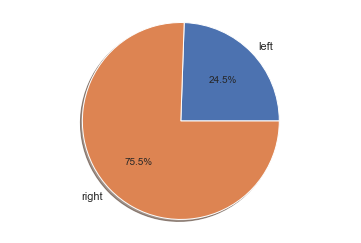

In [25]:
#Ploting pie chart of the distribution
labels = cat_df['preferred_foot'].astype('category').cat.categories.tolist()  #taking all categories to the list
counts = cat_df['preferred_foot'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) #autopct is show the % on plot
ax1.axis('equal')
plt.show()

The 'preferred_foot' is a clear data having only to categories 'right' and 'left' can directly be converted to 0 and 1

##### Encoding Categorical Data
You will now learn different techniques to encode the categorical features to numeric quantities. To keep it simple, you will apply these encoding methods only on the preferred_foot column. However, the same approach can be extended to all columns.

The techniques that we ' ll cover are the following:

*Replacing values---**simply can replace using dictionary map and replace() function of pandas-- as in Help Ref. 1**

    labels = cat_df['preferred_foot'].astype('category').cat.categories.tolist()
    replace_map_comp = {'preferred_foot' : {k: v for k,v in zip(labels,list(range(0,len(labels)+1)))}}
    cat_df.replace(replace_map_comp, inplace=True)

    
 *Encoding labels----- **first must be converted into category dtype**
                       **same can do with sklearn LabelEncoder() ---as example below**
     
     cat_df_new['preferred_foot'] = cat_df['preferred_foot'].astype('category')
     cat_df['preferred_foot'] = cat_df['preferred_foot'].cat.codes
     
 
*One-Hot encoding---**using pd.get_dummies(cat_df, columns=['preferred_foot'], prefix = ['preferred_foot'])**
                    **It solves the issues(detail in ref 1.) associated with the LabelEncoder()**

    *Binary encoding--- can use as per the reference 1
    *Backward difference encoding------------can use as per the reference 1
    *Miscellaneous features----------can use as per the reference 1

In [26]:
#Method 1. Replace Value
# labels = cat_df['preferred_foot'].astype('category').cat.categories.tolist()
# replace_map_comp = {'preferred_foot' : {k: v for k,v in zip(labels,list(range(0,len(labels)+1)))}}
# cat_df_new = cat_df.copy()
# cat_df_new.replace(replace_map_comp, inplace=True)
# cat_df_new.head()


In [27]:
#method 2.  #first need to be convert into category type is must--catery type is must faster
# cat_df_new = cat_df.copy()
# cat_df_new['preferred_foot'] = cat_df['preferred_foot'].astype('category')
# cat_df_new['preferred_foot'] = cat_df_new['preferred_foot'].cat.codes
# cat_df_new.head()


#we can do same with scikit learn LabelEncoder()
cat_df_new1 = cat_df.copy()

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
cat_df_new1['preferred_foot'] = le.fit_transform(cat_df['preferred_foot'])

cat_df_new1.head()

,preferred_foot,attacking_work_rate,defensive_work_rate
0,1,medium,medium
1,1,medium,medium
2,1,medium,medium
3,1,medium,medium
4,1,medium,medium


##### Analysing  'attacking_work_rate' Categorical Feature

In [28]:
print(df_copy['attacking_work_rate'].value_counts())

medium    125070
high       42823
low         8569
None        3317
norm         317
y             94
stoc          86
le            78
Name: attacking_work_rate, dtype: int64


Total Categories: 8


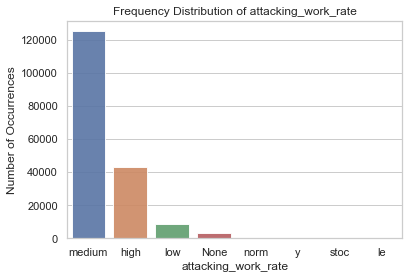

In [29]:

print("Total Categories:",df_copy['attacking_work_rate'].value_counts().count())
attacking_work_rate_count = cat_df['attacking_work_rate'].value_counts()

sns.barplot(attacking_work_rate_count.index, attacking_work_rate_count.values, alpha=0.9)
plt.title('Frequency Distribution of attacking_work_rate')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('attacking_work_rate', fontsize=12)
plt.show()

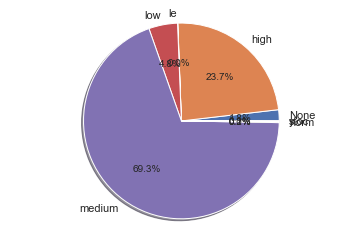

In [30]:
#Ploting pie chart of the distribution
labels = cat_df['attacking_work_rate'].astype('category').cat.categories.tolist()  #taking all categories to the list
counts = cat_df['attacking_work_rate'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) #autopct is show the % on plot
ax1.axis('equal')
plt.show()

##### Observation: over the attacking_work_rate
 attacking_work_rate (le,y,stoc and norm)  

In [31]:
print("le category %:{:.2f}:".format(((cat_df[cat_df.attacking_work_rate == 'le'].shape[0])/cat_df.shape[0])*100))
print("norm category %:{:.2f}:".format(((cat_df[cat_df.attacking_work_rate == 'norm'].shape[0])/cat_df.shape[0])*100))
print("y category %:{:.2f}:".format(((cat_df[cat_df.attacking_work_rate == 'y'].shape[0])/cat_df.shape[0])*100))
print("stoc category %:{:.2f}:".format(((cat_df[cat_df.attacking_work_rate == 'stoc'].shape[0])/cat_df.shape[0])*100))
  
  
print("All are only %",((317+94+86+78)/cat_df.shape[0])*100 ,"% so we can drop these un-meaningful" )
                                       


le category %:0.04:
norm category %:0.18:
y category %:0.05:
stoc category %:0.05:
All are only % 0.318817436818701 % so we can drop these un-meaningful


##### Analyzing defensive_work_rate feature

In [32]:
print(cat_df['defensive_work_rate'].value_counts())

medium    130846
high       27041
low        18432
o           1328
1            421
2            334
ormal        317
3            243
5            231
7            207
0            188
6            179
9            143
4            116
es            94
tocky         86
ean           78
8             70
Name: defensive_work_rate, dtype: int64


Total Categories: 18


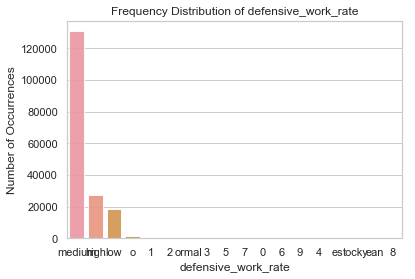

In [33]:
print("Total Categories:",df_copy['defensive_work_rate'].value_counts().count())
defensive_work_rate_count = cat_df['defensive_work_rate'].value_counts()

sns.barplot(defensive_work_rate_count.index, defensive_work_rate_count.values, alpha=0.9)
plt.title('Frequency Distribution of defensive_work_rate')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('defensive_work_rate', fontsize=12)
plt.show()

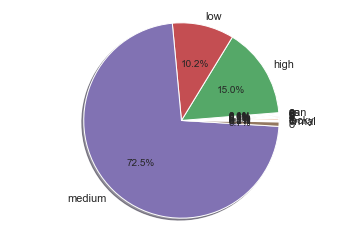

In [34]:
#Ploting pie chart of the distribution
labels = cat_df['defensive_work_rate'].astype('category').cat.categories.tolist()  #taking all categories to the list
counts = cat_df['defensive_work_rate'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) #autopct is show the % on plot
ax1.axis('equal')
plt.show()

In [35]:
#rest all in 
(100-(82.7+15))

2.299999999999997

In [36]:
cat_df_new1=cat_df.copy()
cat_df_new1.head()

,preferred_foot,attacking_work_rate,defensive_work_rate
0,right,medium,medium
1,right,medium,medium
2,right,medium,medium
3,right,medium,medium
4,right,medium,medium


In [37]:
#cat_df[(cat_df.defensive_work_rate != 'medium') & (cat_df.defensive_work_rate  !='high') & (cat_df.defensive_work_rate  !='low')].count()

#cat_df.drop(cat_df[cat_df.defensive_work_rate == 3], inplace=True)

##### Droping all rows having cat_df['defensive_work_rate'] other than medium, high and low as in less in precentage

In [38]:

indexes=cat_df[(cat_df['defensive_work_rate']!='medium') & (cat_df['defensive_work_rate']!='high') & (cat_df['defensive_work_rate']!='low')].index
print(indexes.value_counts())
cat_df.drop(indexes, inplace=True)


108543    1
160467    1
41713     1
74484     1
152728    1
149321    1
102918    1
111335    1
56038     1
111331    1
56034     1
109280    1
178910    1
84696     1
84692     1
160719    1
74485     1
82637     1
56010     1
86727     1
56006     1
180933    1
109252    1
86723     1
180929    1
109248    1
37567     1
111607    1
109244    1
109240    1
         ..
46484     1
183723    1
105921    1
154829    1
105917    1
56761     1
66191     1
142775    1
148918    1
73141     1
38324     1
77235     1
113652    1
73137     1
38320     1
77231     1
109687    1
55343     1
175531    1
108987    1
48553     1
175527    1
48549     1
111605    1
132514    1
48545     1
132510    1
48541     1
48537     1
8192      1
Length: 4035, dtype: int64


In [39]:
print(cat_df['defensive_work_rate'].value_counts())

medium    130846
high       27041
low        18432
Name: defensive_work_rate, dtype: int64


##### Droping all rows having cat_df['attacking_work_rate'] other than medium, high, low and None as in less in precentage

In [40]:
#le,y,stoc and norm
print(cat_df['attacking_work_rate'].value_counts())

# check how many rows of cat_df['attacking_work_rate'] still contains values---  le,y,stoc and norm
attacking_work_rate_indexes=cat_df[(cat_df['attacking_work_rate']!='medium') & (cat_df['attacking_work_rate']!='high') & (cat_df['attacking_work_rate']!='low') & (cat_df['attacking_work_rate'] != 'None')].index
print(attacking_work_rate_indexes.value_counts())

medium    124871
high       42751
low         8539
None         158
Name: attacking_work_rate, dtype: int64
Series([], dtype: int64)


Observation : None is so low in count now we can drop

In [41]:
idx_None=cat_df[cat_df['attacking_work_rate']== 'None'].index
idx_None.value_counts()   # 158 only so drop
cat_df.drop(idx_None, inplace=True)

In [42]:
cat_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 176161 entries, 0 to 183977
Data columns (total 3 columns):
preferred_foot         176161 non-null object
attacking_work_rate    176161 non-null object
defensive_work_rate    176161 non-null object
dtypes: object(3)
memory usage: 5.4+ MB


In [43]:
cat_df.head()

,preferred_foot,attacking_work_rate,defensive_work_rate
0,right,medium,medium
1,right,medium,medium
2,right,medium,medium
3,right,medium,medium
4,right,medium,medium


This was the EDA over the three categorical features in seprate DataFrame cat_df, we can perform same in our original DataFrame i.e. df_copy

In [44]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180354 entries, 0 to 183977
Data columns (total 38 columns):
overall_rating         180354 non-null float64
potential              180354 non-null float64
preferred_foot         180354 non-null object
attacking_work_rate    180354 non-null object
defensive_work_rate    180354 non-null object
crossing               180354 non-null float64
finishing              180354 non-null float64
heading_accuracy       180354 non-null float64
short_passing          180354 non-null float64
volleys                180354 non-null float64
dribbling              180354 non-null float64
curve                  180354 non-null float64
free_kick_accuracy     180354 non-null float64
long_passing           180354 non-null float64
ball_control           180354 non-null float64
acceleration           180354 non-null float64
sprint_speed           180354 non-null float64
agility                180354 non-null float64
reactions              180354 non-null float64

Drop all categories of **attacking_work_rate** and **defensive_work_rate** other than **medium, high and low** as per above EDA on categorical features


###### 1. Droping from defensive_work_rate

In [45]:
indexes=df_copy[(df_copy['defensive_work_rate']!='medium') & (df_copy['defensive_work_rate']!='high') & (df_copy['defensive_work_rate']!='low')].index
print(indexes.value_counts())
df_copy.drop(indexes, inplace=True)


108543    1
160467    1
41713     1
74484     1
152728    1
149321    1
102918    1
111335    1
56038     1
111331    1
56034     1
109280    1
178910    1
84696     1
84692     1
160719    1
74485     1
82637     1
56010     1
86727     1
56006     1
180933    1
109252    1
86723     1
180929    1
109248    1
37567     1
111607    1
109244    1
109240    1
         ..
46484     1
183723    1
105921    1
154829    1
105917    1
56761     1
66191     1
142775    1
148918    1
73141     1
38324     1
77235     1
113652    1
73137     1
38320     1
77231     1
109687    1
55343     1
175531    1
108987    1
48553     1
175527    1
48549     1
111605    1
132514    1
48545     1
132510    1
48541     1
48537     1
8192      1
Length: 4035, dtype: int64


###### 2. Droping from attacking_work_rate

In [46]:
indexes=df_copy[(df_copy['attacking_work_rate']!='medium') & (df_copy['attacking_work_rate']!='high') & (df_copy['attacking_work_rate']!='low')].index
#print(indexes.value_counts())
df_copy.drop(indexes, inplace=True)


###### 3. Cross Check through value count if they existing

In [47]:
#1.
print(df_copy['defensive_work_rate'].value_counts())   # only three potrntial categories

medium    130764
high       26972
low        18425
Name: defensive_work_rate, dtype: int64


In [48]:
#1.
print(df_copy['attacking_work_rate'].value_counts())   # only three potrntial categories

medium    124871
high       42751
low         8539
Name: attacking_work_rate, dtype: int64


In [49]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 176161 entries, 0 to 183977
Data columns (total 38 columns):
overall_rating         176161 non-null float64
potential              176161 non-null float64
preferred_foot         176161 non-null object
attacking_work_rate    176161 non-null object
defensive_work_rate    176161 non-null object
crossing               176161 non-null float64
finishing              176161 non-null float64
heading_accuracy       176161 non-null float64
short_passing          176161 non-null float64
volleys                176161 non-null float64
dribbling              176161 non-null float64
curve                  176161 non-null float64
free_kick_accuracy     176161 non-null float64
long_passing           176161 non-null float64
ball_control           176161 non-null float64
acceleration           176161 non-null float64
sprint_speed           176161 non-null float64
agility                176161 non-null float64
reactions              176161 non-null float64

In [50]:
# 
training_df=pd.get_dummies(df_copy, columns=["preferred_foot","attacking_work_rate","defensive_work_rate"]) #making dummies and combining data


In [51]:
final_train = training_df
final_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 176161 entries, 0 to 183977
Data columns (total 43 columns):
overall_rating                176161 non-null float64
potential                     176161 non-null float64
crossing                      176161 non-null float64
finishing                     176161 non-null float64
heading_accuracy              176161 non-null float64
short_passing                 176161 non-null float64
volleys                       176161 non-null float64
dribbling                     176161 non-null float64
curve                         176161 non-null float64
free_kick_accuracy            176161 non-null float64
long_passing                  176161 non-null float64
ball_control                  176161 non-null float64
acceleration                  176161 non-null float64
sprint_speed                  176161 non-null float64
agility                       176161 non-null float64
reactions                     176161 non-null float64
balance                  

so complex with all features so need more EDA to select fearures

# need to be work on feature selection now

# 3. EDA on Features for selection of features to train data


#### 1.  Ploting Overall rating which is our target

In [52]:
cols=list(final_train.columns)
cols

['overall_rating',
 'potential',
 'crossing',
 'finishing',
 'heading_accuracy',
 'short_passing',
 'volleys',
 'dribbling',
 'curve',
 'free_kick_accuracy',
 'long_passing',
 'ball_control',
 'acceleration',
 'sprint_speed',
 'agility',
 'reactions',
 'balance',
 'shot_power',
 'jumping',
 'stamina',
 'strength',
 'long_shots',
 'aggression',
 'interceptions',
 'positioning',
 'vision',
 'penalties',
 'marking',
 'standing_tackle',
 'sliding_tackle',
 'gk_diving',
 'gk_handling',
 'gk_kicking',
 'gk_positioning',
 'gk_reflexes',
 'preferred_foot_left',
 'preferred_foot_right',
 'attacking_work_rate_high',
 'attacking_work_rate_low',
 'attacking_work_rate_medium',
 'defensive_work_rate_high',
 'defensive_work_rate_low',
 'defensive_work_rate_medium']

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


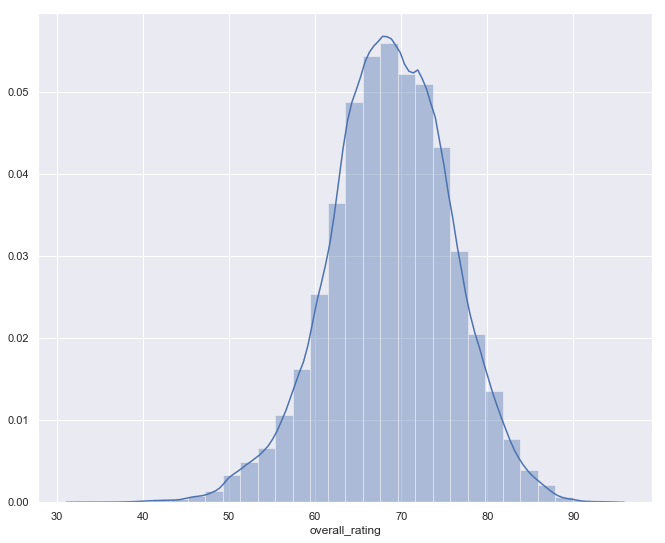

In [53]:
sns.set(rc={'figure.figsize':(11,9)})  
sns.distplot(final_train['overall_rating'], bins=30)   
plt.show()

The target(overall rating) is all most normally distributed, hence we can plot correlation matrix and heatmap to check the features which are having high correlation with our target variable

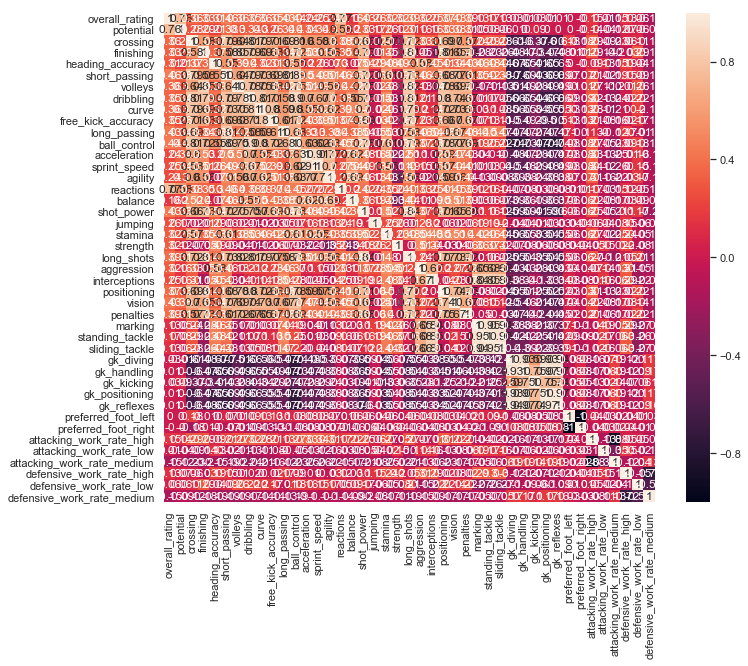

In [54]:
correlation_matrix = final_train.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

In [149]:
#full correlation matrix
correlation_matrix

,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,...,gk_positioning,gk_reflexes,preferred_foot_left,preferred_foot_right,attacking_work_rate_high,attacking_work_rate_low,attacking_work_rate_medium,defensive_work_rate_high,defensive_work_rate_low,defensive_work_rate_medium
overall_rating,1.00,0.76,0.36,0.33,0.31,0.46,0.36,0.35,0.36,0.35,...,0.01,0.01,0.00,-0.00,0.15,0.01,-0.15,0.13,0.06,-0.15
potential,0.76,1.00,0.28,0.29,0.21,0.38,0.30,0.34,0.30,0.26,...,0.00,0.00,0.00,-0.00,0.14,-0.04,-0.12,0.07,0.06,-0.09
crossing,0.36,0.28,1.00,0.58,0.37,0.79,0.64,0.81,0.79,0.71,...,-0.60,-0.60,0.18,-0.18,0.29,-0.09,-0.23,0.06,0.11,-0.12
finishing,0.33,0.29,0.58,1.00,0.37,0.58,0.85,0.79,0.69,0.63,...,-0.47,-0.48,-0.01,0.01,0.29,-0.14,-0.20,-0.03,0.29,-0.18
heading_accuracy,0.31,0.21,0.37,0.37,1.00,0.55,0.39,0.40,0.32,0.31,...,-0.65,-0.65,0.00,-0.00,0.09,0.13,-0.15,0.19,0.04,-0.19
short_passing,0.46,0.38,0.79,0.58,0.55,1.00,0.64,0.79,0.73,0.69,...,-0.69,-0.69,0.07,-0.07,0.21,-0.02,-0.19,0.15,0.09,-0.19
volleys,0.36,0.30,0.64,0.85,0.39,0.64,1.00,0.78,0.75,0.68,...,-0.49,-0.49,0.01,-0.01,0.27,-0.11,-0.20,0.01,0.26,-0.19
dribbling,0.35,0.34,0.81,0.79,0.40,0.79,0.78,1.00,0.81,0.71,...,-0.66,-0.66,0.09,-0.09,0.32,-0.13,-0.24,0.02,0.22,-0.17
curve,0.36,0.30,0.79,0.69,0.32,0.73,0.75,0.81,1.00,0.80,...,-0.55,-0.55,0.13,-0.13,0.28,-0.11,-0.21,0.00,0.20,-0.14
free_kick_accuracy,0.35,0.26,0.71,0.63,0.31,0.69,0.68,0.71,0.80,1.00,...,-0.50,-0.50,0.13,-0.13,0.21,-0.08,-0.16,0.02,0.17,-0.14


In [150]:
correlation_matrix['overall_rating']

overall_rating                1.00
potential                     0.76
crossing                      0.36
finishing                     0.33
heading_accuracy              0.31
short_passing                 0.46
volleys                       0.36
dribbling                     0.35
curve                         0.36
free_kick_accuracy            0.35
long_passing                  0.43
ball_control                  0.44
acceleration                  0.24
sprint_speed                  0.25
agility                       0.24
reactions                     0.77
balance                       0.16
shot_power                    0.43
jumping                       0.26
stamina                       0.32
strength                      0.32
long_shots                    0.39
aggression                    0.32
interceptions                 0.25
positioning                   0.37
vision                        0.43
penalties                     0.39
marking                       0.13
standing_tackle     

as per the overall_rating is normally distributed so we are finding the highest correlation in the above matrix so that we can assumpt some feature\
We are selecting features having linear correlation **more that .30 with aour target overall_rating**

In [62]:
all_features=list(final_train.columns)
all_features


['overall_rating',
 'potential',
 'crossing',
 'finishing',
 'heading_accuracy',
 'short_passing',
 'volleys',
 'dribbling',
 'curve',
 'free_kick_accuracy',
 'long_passing',
 'ball_control',
 'acceleration',
 'sprint_speed',
 'agility',
 'reactions',
 'balance',
 'shot_power',
 'jumping',
 'stamina',
 'strength',
 'long_shots',
 'aggression',
 'interceptions',
 'positioning',
 'vision',
 'penalties',
 'marking',
 'standing_tackle',
 'sliding_tackle',
 'gk_diving',
 'gk_handling',
 'gk_kicking',
 'gk_positioning',
 'gk_reflexes',
 'preferred_foot_left',
 'preferred_foot_right',
 'attacking_work_rate_high',
 'attacking_work_rate_low',
 'attacking_work_rate_medium',
 'defensive_work_rate_high',
 'defensive_work_rate_low',
 'defensive_work_rate_medium']

In [67]:
selected_features=['potential', 'finishing',  'short_passing', 'free_kick_accuracy',
 'long_passing',
 'ball_control',
 'reactions',
 'shot_power',
 
 'stamina',
 'strength',
 'long_shots',
 'aggression',
 
 'positioning',
 
 'penalties',
 
 ]
selected_features

['potential',
 'finishing',
 'short_passing',
 'free_kick_accuracy',
 'long_passing',
 'ball_control',
 'reactions',
 'shot_power',
 'stamina',
 'strength',
 'long_shots',
 'aggression',
 'positioning',
 'penalties']

In [129]:
X=final_train[selected_features]

y=final_train['overall_rating']
X.head()

,potential,finishing,short_passing,free_kick_accuracy,long_passing,ball_control,reactions,shot_power,stamina,strength,long_shots,aggression,positioning,penalties
0,71.0,44.0,61.0,39.0,64.0,49.0,47.0,55.0,54.0,76.0,35.0,71.0,45.0,48.0
1,71.0,44.0,61.0,39.0,64.0,49.0,47.0,55.0,54.0,76.0,35.0,71.0,45.0,48.0
2,66.0,44.0,61.0,39.0,64.0,49.0,47.0,55.0,54.0,76.0,35.0,63.0,45.0,48.0
3,65.0,43.0,60.0,38.0,63.0,48.0,46.0,54.0,54.0,76.0,34.0,62.0,44.0,47.0
4,65.0,43.0,60.0,38.0,63.0,48.0,46.0,54.0,54.0,76.0,34.0,62.0,44.0,47.0


In [78]:
#train model with linear regression first split into train test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

my_le=LinearRegression()
my_le.fit(X_train,y_train)

print(my_le.intercept_)        # c 
print(my_le.coef_)          #slopes

2.1157037006853727
[ 0.49445489  0.00870197 -0.01383418  0.01181159  0.05322358 -0.004843
  0.33147492  0.01381143 -0.02460625  0.09383343 -0.00206082 -0.00122765
 -0.01592585  0.01691833]


Observations : These are the c coficient and slopes for my different features for our regression model y=c+m1x1+m2x2.....+mnxn
    
    we will observe them in confedence if they fall in our confedence interval

In [87]:
y_pred=my_le.predict(X_test)
y_pred

array([65.43504211, 64.36030734, 73.62689309, ..., 61.05390263,
       65.32577322, 68.31365401])

## Model Evaluation

Can be done by two ways

**1. Stats model OLS**

**2. Sklearn**


### 1. By Statsmodels

In [157]:
#calculating confidence interval
import statsmodels.formula.api as smf
lm = smf.ols(formula='overall_rating ~ preferred_foot_left+potential+finishing+short_passing+free_kick_accuracy+long_passing+ball_control+reactions+shot_power \
 +stamina+strength+long_shots+aggression+positioning+penalties', data=final_train).fit()
lm.conf_int(alpha = 0.05)  # 95% confidence interval

,0,1
Intercept,1.998120,2.374430
preferred_foot_left,-0.025990,0.046799
potential,0.492530,0.498485
finishing,0.007789,0.011451
short_passing,-0.016132,-0.010021
free_kick_accuracy,0.010144,0.013181
long_passing,0.051648,0.055614
ball_control,-0.010126,-0.004345
reactions,0.327620,0.332180
shot_power,0.011813,0.015843


Observation: all above calculated are in our 95% confidence interval and can be cross varified by the values calculated in cell 78, as all those fall in 95% confidence interval means in these interval

### Hypothesis Testing and p-values
description in regression model excercise

###### **p-values Definition:** Probability of obtaining a sample **"more extreme"** then the ones observed in your data, assuming H0 : is true 

In [158]:
# print the p-values for the model coefficients
lm.pvalues

Intercept              1.216714e-114
preferred_foot_left     5.752633e-01
potential               0.000000e+00
finishing               7.213532e-25
short_passing           4.994531e-17
free_kick_accuracy      3.607799e-51
long_passing            0.000000e+00
ball_control            9.298825e-07
reactions               0.000000e+00
shot_power              3.202134e-41
stamina                2.778504e-202
strength                0.000000e+00
long_shots              7.299946e-02
aggression              9.091969e-01
positioning             1.217195e-67
penalties               3.354877e-85
dtype: float64

In [159]:
# print the R-squared value for the model
lm.rsquared        # closer to one is good and less than .3 is depict no relation

0.7813934196220609

In [160]:
lm.bse

Intercept              0.095999
preferred_foot_left    0.018569
potential              0.001519
finishing              0.000934
short_passing          0.001559
free_kick_accuracy     0.000775
long_passing           0.001012
ball_control           0.001475
reactions              0.001163
shot_power             0.001028
stamina                0.000846
strength               0.000821
long_shots             0.001066
aggression             0.000728
positioning            0.000887
penalties              0.000868
dtype: float64

In [161]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         overall_rating   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.781
Method:                 Least Squares   F-statistic:                 4.197e+04
Date:                Sun, 01 Sep 2019   Prob (F-statistic):               0.00
Time:                        13:02:32   Log-Likelihood:            -4.5942e+05
No. Observations:              176161   AIC:                         9.189e+05
Df Residuals:                  176145   BIC:                         9.190e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               2.1863      0.096     22.774      0.000       1.998       2.374
preferred_foot_left     0.0104      0.019      0.560      0.575      -0.026       0.047
potential               0.4955      0.002    326.191      0.000       0.493       0.498
finishing               0.0096      0.001     10.299      0.000       0.008       0.011
short_passing          -0.0131      0.002     -8.388      0.000      -0.016      -0.010
free_kick_accuracy      0.0117      0.001     15.052      0.000       0.010       0.013
long_passing            0.0536      0.001     53.004      0.000       0.052       0.056
ball_control           -0.0072      0.001     -4.906      0.000      -0.010      -0.004
reactions               0.3299      0.001    283.591      0.000       0.328       0.332
shot_power              0.0138      0.001     13.451      0.000       0.012       0.016
stamina                -0.0257      0.001    -30.386      0.000      -0.027      -0.024
strength                0.0931      0.001    113.293      0.000       0.091       0.095
long_shots             -0.0019      0.001     -1.793      0.073      -0.004       0.000
aggression             8.3e-05      0.001      0.114      0.909      -0.001       0.002
positioning            -0.0154      0.001    -17.385      0.000      -0.017      -0.014
penalties               0.0170      0.001     19.571      0.000       0.015       0.019
==============================================================================
Omnibus:                    15600.845   Durbin-Watson:                   0.392
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            46333.089
Skew:                          -0.476   Prob(JB):                         0.00
Kurtosis:                       5.325   Cond. No.                     2.83e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.83e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

##### Observation:

when we include **preferred_foot_left** in the model


**NULL HYPOTHESIS:** There is no relationship between overall rating and the selected feature.

**ALTERNATE HYPOTHESIS:** There is a realtionship between the overall rating and and selected feature.

we find that for preferred_foot p-values are 0.545 that is greater than 0.05 that have no significance.

Thus the Null hypothesis is accepted for this parameter.

## 2. Evaluation by sklearn

In [ ]:
There are three metrics to evaluate a linear model
1. Mean absolute error (MAE)

2.Mean Squared Error(MSE)

3. RMSE(Root Mean Squared Error) mostly used

In [151]:
from sklearn import metrics
from sklearn.metrics import r2_score

In [155]:
#MAE
print(metrics.mean_absolute_error(y_test, y_pred))


#MSE
print(metrics.mean_squared_error(y_test, y_pred))


#RMSE
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

# Calcuating the R-Squared value

print(r2_score(y_test, y_pred) )
#lm.rsquared which is closer to this 

2.4485317025348845
10.85714234306701
3.295017806183604
0.7794258134647846


### Cross Validation over X, y

In [137]:
scores = cross_val_score(estimator= my_le,     # Model to test
                X= X,  
                y = y,      # Target variable
                               # Scoring metric    
                cv=50)   

print("Accuracy per fold: ")
print(scores)
print("Average accuracy: ", scores.mean())

Accuracy per fold: 
[0.79152174 0.74648352 0.78681698 0.78872116 0.81931999 0.77873857
 0.75633433 0.79771354 0.79109506 0.79122007 0.77546846 0.78235442
 0.7732867  0.76733967 0.75757307 0.76804937 0.7926673  0.75135759
 0.72926404 0.79192888 0.7765114  0.79103603 0.76327046 0.7674274
 0.78495697 0.74085815 0.80448557 0.73826372 0.77303049 0.76114794
 0.79390887 0.80118736 0.79262928 0.81742362 0.81312464 0.762677
 0.77863045 0.73812661 0.82313038 0.76192786 0.7361491  0.79416324
 0.78172502 0.80509654 0.75858473 0.79866918 0.78629467 0.75771956
 0.7962906  0.77991641]
Average accuracy:  0.7783123538930508


### Cross Validation over X_train, y_train

In [138]:
scores = cross_val_score(estimator= my_le,     # Model to test
                X= X_train,  
                y = y_train,      # Target variable
                               # Scoring metric    
                cv=50)   

print("Accuracy per fold: ")
print(scores)
print("Average accuracy: ", scores.mean())

Accuracy per fold: 
[0.77087161 0.79008561 0.77969942 0.77742483 0.78037471 0.7753653
 0.76963923 0.77463241 0.78145734 0.78970875 0.78343478 0.787028
 0.77397721 0.78939267 0.78094633 0.79002845 0.78136579 0.77346873
 0.77506261 0.78391536 0.78821366 0.77669218 0.77352926 0.78067579
 0.79595561 0.78422795 0.7835774  0.78137516 0.78200128 0.77655789
 0.78960309 0.77964615 0.77243394 0.78941838 0.77612576 0.78632806
 0.78176577 0.79504038 0.77178834 0.7873985  0.78623713 0.78050026
 0.78124977 0.7823062  0.79333001 0.79089299 0.77765631 0.78860291
 0.7641634  0.77948406]
Average accuracy:  0.7816931344897042


### Cross Validation over X_test, y_test

In [139]:
scores = cross_val_score(estimator= my_le,     # Model to test
                X= X_test,  
                y = y_test,      # Target variable
                               # Scoring metric    
                cv=50)   

print("Accuracy per fold: ")
print(scores)
print("Average accuracy: ", scores.mean())

Accuracy per fold: 
[0.78522214 0.80160703 0.78333275 0.79045684 0.79874347 0.77580305
 0.77578529 0.76111224 0.78369019 0.79727005 0.76120684 0.7776482
 0.77922952 0.77579782 0.81976134 0.74640359 0.78891958 0.721647
 0.80684683 0.77751178 0.75766898 0.77007288 0.77561178 0.81268281
 0.7846204  0.75894138 0.78043871 0.7325381  0.74294808 0.74328294
 0.79252081 0.76126054 0.77163337 0.80669523 0.79008544 0.78322249
 0.79737413 0.75603036 0.80435421 0.74775689 0.77565701 0.77978955
 0.8025277  0.75165423 0.77930573 0.78547467 0.81118827 0.81133131
 0.78750004 0.77793317]
Average accuracy:  0.7788019356774417


### Cross Validation over X_test, y_pred

In [143]:
scores = cross_val_score(estimator= my_le,     # Model to test
                X= X_test,
                y = y_pred,      # Target variable
                               # Scoring metric    
                cv=50)   

print("Accuracy per fold: ")
print(scores)
print("Average accuracy: ", scores.mean())

Accuracy per fold: 
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1.]
Average accuracy:  1.0


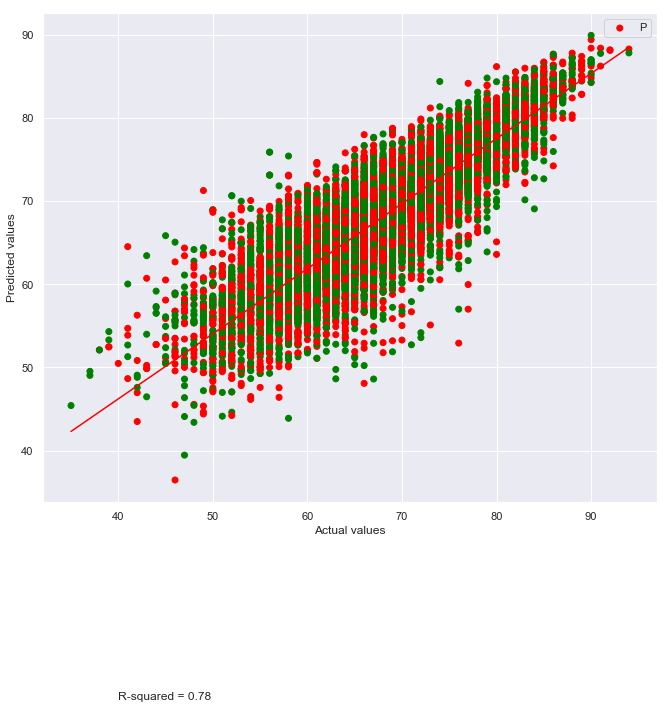

In [175]:
# Plotting R-Square
fig, ax = plt.subplots()
r_squared = r2_score(y_test, y_pred)
ax.scatter(y_test, y_pred, color=['red','green'])
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
ax.legend( 'Predicted values',loc="best")
ax.grid(True)
x1 = y_test
y1 = y_pred

# Line connecting all the unique values of y_test
plt.plot(np.unique(y_test), np.poly1d(np.polyfit(x1,y1, 1))(np.unique(y_test)),color='red')

plt.text(40,10,'R-squared = %0.2f' % r_squared)
plt.show()

# Overall Observation

The overall accuracy of above model is 0.78, we can add and remove several features in this to improve this

Help References:
    https://www.datacamp.com/community/tutorials/categorical-data